# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Содержание
1. Откройте файл с данными и изучите общую информацию.
2. Предобработка данных
3. Посчитайте и добавьте в таблицу новые столбцы
4. Проведите исследовательский анализ данных
5. Какие факторы больше всего влияют на общую (полную) стоимость объекта
6. Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
7. Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра.
8. Общий вывод



### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
pd.options.mode.chained_assignment = None
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal='.')
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
df.info() #Очень много NaN в таблице.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
df.describe() # данные в норме, но немного смущает 19-ти комнатные квартиры, 100 метровые потолки и 5 балконов

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [5]:
total_isna = df.isna().sum()
total_isna

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
total_isna.sum()

101441

<AxesSubplot:>

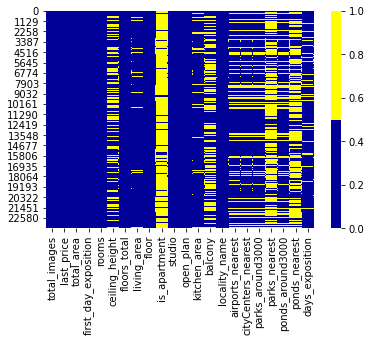

In [7]:
cols = df.columns[:30]
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [8]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

total_images - 0%
last_price - 0%
total_area - 0%
first_day_exposition - 0%
rooms - 0%
ceiling_height - 39%
floors_total - 0%
living_area - 8%
floor - 0%
is_apartment - 88%
studio - 0%
open_plan - 0%
kitchen_area - 10%
balcony - 49%
locality_name - 0%
airports_nearest - 23%
cityCenters_nearest - 23%
parks_around3000 - 23%
parks_nearest - 66%
ponds_around3000 - 23%
ponds_nearest - 62%
days_exposition - 13%


*is_apartment: Многие игнорировали строку апартаменты. Ниже посмотрим что со значениями 
*parks_nearest, ponds_nearest: Эти данные были выгружены системой автоматически. Не будем трогать пропуски, потому как проставить значения в них может быть ошибочным
*balcony: Балконы нужно проверить, возможно вместо нуля стоит nan. 
*ceiling_height: Высоту потолков заполняли люди, поэтому это человеческий фактор, можно заполнить средним.
*airports_nearest, cityCenters_nearest: Это расчитывалось автоматически, заполнить нечем
*parks_around3000,  ponds_around3000: Эти данные были выгружены системой автоматически. Не будем трогать пропуски, потому как проставить значения в них может быть ошибочным
*days_exposition: Расчитать по средней будет ошибкой, поскольку скорее всего сделка была закрыта, но не отображена в сервисе. Заполнять пропуски не будем
*kitchen_area, living_area: Так как в данных есть студии, то возможно не заполнено из-за того, что в этих квартирах нет разделения кухни и жилой комнаты. Посмотрим количество таких студий и решим что делать.
*floors_total: Заполнить средним или 0 будет ошибкой. Не трогаем этот столбец
*locality_name: Квартиры находятся не только в городе, но и области. Областные заполнить невозможно, а вот из Санкт-Петербурга заполним только те объекты, которые находятся не дальше 20км от центра.

### Предобработка данных

*is_apartment: Посмотрим что со значениями

In [9]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Заменять на False будет не совсем корректно. Оставим как есть.

*balcony: Где данные отсутствуют проставим нули.

In [10]:
df['balcony'] = df['balcony'].fillna(0)
print('Количество NaN в столбце balcony:', df['balcony'].isnull().sum())

Количество NaN в столбце balcony: 0


*ceiling_height: Заполним средним значением

In [11]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
print('Количество NaN в столбце ceiling_height:', df['ceiling_height'].isnull().sum())

Количество NaN в столбце ceiling_height: 0


*kitchen_area, living_area: Сначала посмотрим сколько всего пропусков, а пототом посмотрим сколько именно пропусков по студиям.

In [12]:
print('Количество NaN по kitchen_area:', df['kitchen_area'].isnull().sum())
print('Количество NaN по living_area:', df['living_area'].isnull().sum())

Количество NaN по kitchen_area: 2278
Количество NaN по living_area: 1903


In [13]:
df.query('rooms == 0')[['kitchen_area', 'living_area']].isnull().sum()

kitchen_area    197
living_area      14
dtype: int64

Из 2000 пропусков не заполнены по студиям лишь 197 и 14, это очень мало. Соответствеено проблема не в студиях. Оставим как есть.

*locality_name: Сначала посмотрим сколько всего пропусков. 

In [14]:
print('Количество NaN по locality_name:', df['locality_name'].isnull().sum())

Количество NaN по locality_name: 49


Количество невелико, поэтому эти строки можно удалить

In [15]:
df = df.dropna(subset=['locality_name'])
print('Количество NaN по locality_name:', df['locality_name'].isnull().sum())

Количество NaN по locality_name: 0


In [16]:
total_is = df.isna().sum()
total_is

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area              1898
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

In [17]:
total_is.sum()

80538

In [18]:
print('Количество Nan до корректировки:', total_isna.sum())
print ('Количество Nan после корректировки:', total_is.sum())

Количество Nan до корректировки: 101441
Количество Nan после корректировки: 80538


Мы уменьшили количество незаполлненных строк на 20% это не много. Чтобы избежать пропусков, необходимо сделать обязательным к заполнению строки апартаметов, а так же настроить автоматизированную систему по геопозиции. 

Изменение типа данных по столбцам.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [20]:
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Изменим:
last_price - в целочисленный тип нам не нужны копейки в цене, а так же приведем столбец к тысячам
first_day_exposition - даты в datetime
ceiling_height - округлим до 1го знака после запятой, нам ни к чему длинные дроби
floors_total - в целочисленный тип, не может быть дробное количество этажей
balcony - в целочисленный тип,  не может быть дробное количество этажей
airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest - в целочисленный тип, дробь ничего не даст
days_exposition - в целочисленный тип, количество дней должно быть целым
floor - в целочисленный тип

In [21]:
df['last_price'] = df['last_price'].astype('Int32')
df['last_price']
#last_price - в целочисленный тип

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23650, dtype: Int32

In [22]:
df['floors_total'] = df['floors_total'].astype('Int64')
df['floors_total']
#floors_total - в целочисленный тип

0        16
1        11
2         5
3        14
4        14
         ..
23694     5
23695     5
23696     3
23697    17
23698     5
Name: floors_total, Length: 23650, dtype: Int64

In [23]:
df['balcony'] = df['balcony'].astype('Int64')
df['balcony']
#balcony - в целочисленный тип

0        0
1        2
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    2
23698    0
Name: balcony, Length: 23650, dtype: Int64

In [24]:
df['airports_nearest'] = df['airports_nearest'].astype('Int64')
df['airports_nearest']
#airports_nearest - в целочисленный тип

0        18863
1        12817
2        21741
3        28098
4        31856
         ...  
23694    24665
23695     <NA>
23696     <NA>
23697    39140
23698     <NA>
Name: airports_nearest, Length: 23650, dtype: Int64

In [25]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('Int64')
df['cityCenters_nearest']#cityCenters_nearest - в целочисленный тип

0        16028
1        18603
2        13933
3         6800
4         8098
         ...  
23694     4232
23695     <NA>
23696     <NA>
23697    10364
23698     <NA>
Name: cityCenters_nearest, Length: 23650, dtype: Int64

In [26]:
df['parks_around3000'] = df['parks_around3000'].astype('Int64')
df['parks_around3000']#parks_around3000 -  в целочисленный тип

0           1
1           0
2           1
3           2
4           2
         ... 
23694       1
23695    <NA>
23696    <NA>
23697       2
23698    <NA>
Name: parks_around3000, Length: 23650, dtype: Int64

In [27]:
df['parks_nearest'] = df['parks_nearest'].astype('Int64')
df['parks_nearest']#parks_nearest - в целочисленный тип

0         482
1        <NA>
2          90
3          84
4         112
         ... 
23694     796
23695    <NA>
23696    <NA>
23697     173
23698    <NA>
Name: parks_nearest, Length: 23650, dtype: Int64

In [28]:
df['ponds_around3000'] = df['ponds_around3000'].astype('Int64')
df['ponds_around3000']#ponds_around3000 -  в целочисленный тип

0           2
1           0
2           2
3           3
4           1
         ... 
23694       3
23695    <NA>
23696    <NA>
23697       3
23698    <NA>
Name: ponds_around3000, Length: 23650, dtype: Int64

In [29]:
df['ponds_nearest'] = df['ponds_nearest'].astype('Int64')
df['ponds_nearest'] #ponds_nearest -в целочисленный тип

0         755
1        <NA>
2         574
3         234
4          48
         ... 
23694     381
23695    <NA>
23696    <NA>
23697     196
23698    <NA>
Name: ponds_nearest, Length: 23650, dtype: Int64

In [30]:
np.floor(pd.to_numeric(df['days_exposition'], errors='coerce')).astype('Int64')
#days_exposition - в целочисленный тип

0        <NA>
1          81
2         558
3         424
4         121
         ... 
23694    <NA>
23695      45
23696    <NA>
23697     602
23698    <NA>
Name: days_exposition, Length: 23650, dtype: Int64

In [31]:
df['ceiling_height'] = df[df['ceiling_height'].notnull()]['ceiling_height'].round(1)
df['ceiling_height'] #ceiling_height - округлим до 1го знака после запятой

0        2.7
1        2.6
2        2.6
3        2.6
4        3.0
        ... 
23694    3.7
23695    2.6
23696    2.6
23697    3.0
23698    2.5
Name: ceiling_height, Length: 23650, dtype: float64

In [32]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['first_day_exposition']#даты в datetime

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23650, dtype: datetime64[ns]

In [33]:
df['floor'].astype('Int64') #этажи в целочиленный

0         8
1         1
2         4
3         9
4        13
         ..
23694     3
23695     4
23696     1
23697    12
23698     1
Name: floor, Length: 23650, dtype: Int64

Проверим неявные дубликаты в названиях населённых пунктов

In [34]:
df['locality_name'].unique() #посмотрим уникальные значения

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Слишком много видов поселков. Приведем все виды к одному варианту(поселок).

In [35]:
to_replace = ['посёлок', 'посёлок городского типа', 'поселок городского типа', 'городской посёлок', 'городской поселок', 'поселок при железнодорожной станции', 'поселок станции']
for substr in to_replace:
    df['locality_name'] = df['locality_name'].str.replace(substr, 'поселок')
df['locality_name'].unique()
    

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

In [36]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
df['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

### Работаем с выбросами

In [37]:
# КОД РЕВЬЮЕРА

print(len(df))
df[['last_price', 'total_area','rooms', 'ceiling_height', 'kitchen_area', 'living_area','days_exposition' ]].describe().loc[['min', 'max']]

23650


,last_price,total_area,rooms,ceiling_height,kitchen_area,living_area,days_exposition
min,12190.0,12.0,0.0,1.0,1.3,2.0,1.0
max,763000000.0,900.0,19.0,100.0,112.0,409.7,1580.0


In [38]:
print(len(df))
df[['last_price']].describe().round()#Проанализируем цену квартир

23650


,last_price
count,23650.0
mean,6541127.0
std,10896399.0
min,12190.0
25%,3400000.0
50%,4650000.0
75%,6799000.0
max,763000000.0


Минимальное 12000р, а максимальное 763млн. Сначала проанализируем максимальное значение, а потом минимальное и решим что с ними делать.

(40000000.0, 763000000.0)

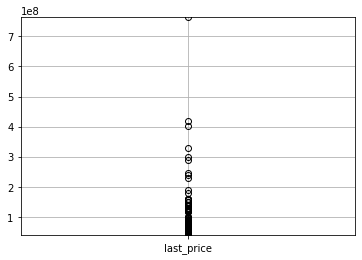

In [39]:
df.boxplot('last_price')
plt.ylim(40000000, 763000000)#Посмотрим выбросы

На графике виден выброс, он находится выше 700млн. Необходимо избавиться от этого выброса.

In [40]:
df['last_price'] = df.loc[df['last_price']<40000000, 'last_price']

In [41]:
print(len(df))
df[['last_price']].describe().round()#Проанализируем цену квартир после удаления выбросов

23650


,last_price
count,23456.0
mean,5893376.0
std,4551300.0
min,12190.0
25%,3400000.0
50%,4600000.0
75%,6700000.0
max,39990000.0


Убрали выброс. Убрано 0,8%. Среднее приблизилось к медиане. Теперь посмотрим минимальные значения. 12т.р это какя-то ошибка наверняка, поэтому поставим границу на 1млн для того чтобы ликвидировать этот выброс.

In [42]:
df['last_price'] = df.loc[df['last_price']>1000000, 'last_price']

In [43]:
print(len(df))
df[['last_price']].describe().round()

23650


,last_price
count,23211.0
mean,5947274.0
std,4544728.0
min,1010000.0
25%,3450000.0
50%,4650000.0
75%,6700000.0
max,39990000.0


В итоге мы убрали 439 строк, это всего составило 2% от данных. Максимальный порог в 10% соблюден. Среднее и медиана по отношению друг к другу стали ближе, а это определяет верную выборку.

In [44]:
df[['total_area']].describe().round() #Проанализируем столбец с общей площадью.

,total_area
count,23650.0
mean,60.0
std,36.0
min,12.0
25%,40.0
50%,52.0
75%,70.0
max,900.0


Минимальная общая площадь 12 квадратов, максимальная 900. Посмотрим график.

(100.0, 910.0)

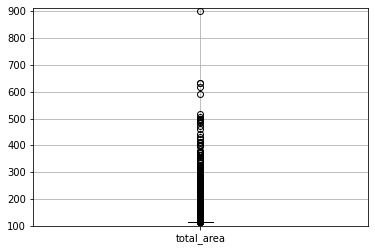

In [45]:
df.boxplot('total_area')
plt.ylim(100, 910)

(200.0, 910.0)

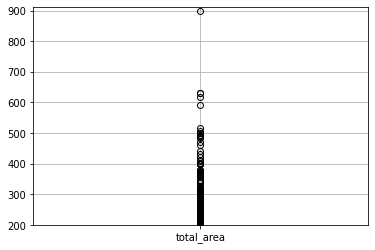

In [46]:
df.boxplot('total_area')
plt.ylim(200, 910)

Избавимся от всех выбросов что выше 200кв.

In [47]:
df['total_area'] = df.loc[df['total_area']<200, 'total_area']

In [48]:
print(len(df))
df[['total_area']].describe()

23650


,total_area
count,23419.000000
mean,58.131265
std,26.455600
min,12.000000
25%,40.000000
50%,51.800000
75%,68.800000
max,199.200000


In [49]:
df['total_area'] = df.loc[df['total_area']>16, 'total_area']

In [50]:
print(len(df))
df[['total_area']].describe()

23650


,total_area
count,23409.000000
mean,58.150130
std,26.445484
min,17.000000
25%,40.000000
50%,51.800000
75%,68.800000
max,199.200000


Теперь минимальная площадь 17кв.м что вполне может быть кварой в формате студии и максильная площадь 199,2кв.м. Медиана и среднее значение близки друг к другу. Мы убрали всего 1% данных.

In [51]:
df[['rooms']].describe() #Проанализируем количество комнат

,rooms
count,23650.000000
mean,2.070106
std,1.078620
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,19.000000


<AxesSubplot:>

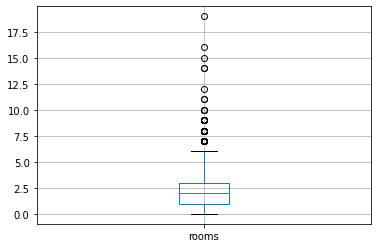

In [52]:
df.boxplot('rooms')

Оставим 7 комнат чтобы не выбиваться из значений. 0 комнат вполне может быть если это студия.

In [53]:
df['rooms'] = df.loc[df['rooms']<7, 'rooms']

In [54]:
print(len(df))
df[['rooms']].describe().round()

23650


,rooms
count,23560.0
mean,2.0
std,1.0
min,0.0
25%,1.0
50%,2.0
75%,3.0
max,6.0


Оставили максимально 6 комнат. Удалено 0,3%.

In [55]:
print(len(df))
df[['ceiling_height']].describe() #Проанализируем высоту потолков

23650


,ceiling_height
count,23650.000000
mean,2.707522
std,0.991100
min,1.000000
25%,2.600000
50%,2.600000
75%,2.700000
max,100.000000


Минимальное значение это 1кв.м. Это совсем мало, установим высоту от 2кв.м. Так же посмотрим по графику максимальные значения и решим что с ними будем делать.

<AxesSubplot:>

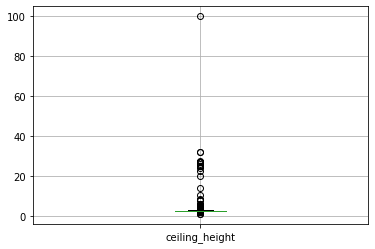

In [56]:
df.boxplot('ceiling_height')

(0.0, 20.0)

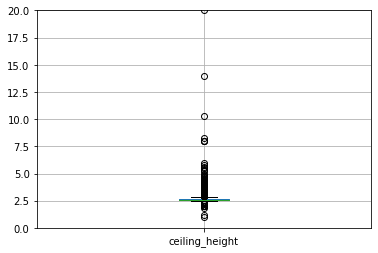

In [57]:
df.boxplot('ceiling_height')
plt.ylim(0, 20)

Сделаем выборку до 5кв.м. чтобы отбросить совсем уж явные выбросы

In [58]:
df['ceiling_height'] = df.loc[df['ceiling_height']<5, 'ceiling_height'] 

In [59]:
print(len(df))
df[['ceiling_height']].describe()

23650


,ceiling_height
count,23613.000000
mean,2.678927
std,0.221813
min,1.000000
25%,2.600000
50%,2.600000
75%,2.700000
max,4.900000


In [60]:
df['ceiling_height'] = df.loc[df['ceiling_height']>2, 'ceiling_height']

In [61]:
print(len(df))
df[['ceiling_height']].describe()

23650


,ceiling_height
count,23599.000000
mean,2.679414
std,0.220840
min,2.200000
25%,2.600000
50%,2.600000
75%,2.700000
max,4.900000


Теперь значения более адекватны. Отброшено всего 0,2%. Среднее и медиана близки друг к другу. 
Минимальный потолок 2,2, максимальный 4.

In [62]:
print(len(df))
df[['kitchen_area']].describe() #Проанализируем площадь кухни

23650


,kitchen_area
count,21381.000000
mean,10.566403
std,5.901753
min,1.300000
25%,7.000000
50%,9.100000
75%,12.000000
max,112.000000


Минимальное трогать не будем, потому как это может быть указана зона кухни в студии. А вот максимальные посмотрим на графике.

(0.0, 114.0)

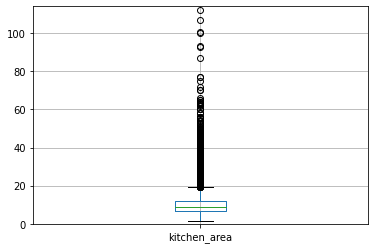

In [63]:
df.boxplot('kitchen_area')
plt.ylim(0, 114)

Так как мы сократили площадь всей квартиры до 200кв.м, то судя по графику, кухню вполне можно ограничить 20кв.м. 

In [64]:
df['kitchen_area'] = df.loc[df['kitchen_area']<20, 'kitchen_area']

In [65]:
print(len(df))
df[['kitchen_area']].describe()

23650


,kitchen_area
count,20227.000000
mean,9.525464
std,3.157235
min,1.300000
25%,7.000000
50%,9.000000
75%,11.100000
max,19.940000


In [66]:
print(len(df))
df[['living_area']].describe()

23650


,living_area
count,21752.000000
mean,34.448356
std,22.037664
min,2.000000
25%,18.600000
50%,30.000000
75%,42.300000
max,409.700000


Минимальная жилая площадь составляет 2 кв. это очень мало и неправдоподобно. 
Так как у нас общая минимальная площадь равна 12кв.м, жилую установим 5кв.м. 
Максимальные значения помотрим на графике.

In [67]:
df['living_area'] = df.loc[df['living_area']>5, 'living_area']

(0.0, 410.0)

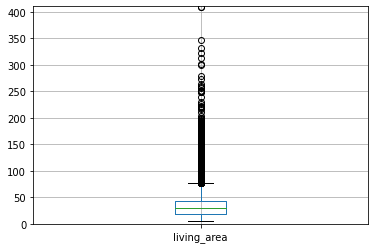

In [68]:
df.boxplot('living_area')
plt.ylim(0, 410)

При максимальной площади 20кв.м. установим 80кв.м. для жилой площади. 

In [69]:
df['living_area'] = df.loc[df['living_area']<80, 'living_area']

In [70]:
print(len(df))
df[['living_area']].describe()

23650


,living_area
count,21030.000000
mean,31.669338
std,14.117834
min,5.400000
25%,18.400000
50%,30.000000
75%,41.000000
max,79.740000


Теперь данные по жилой площади более реалистичные.Удалено 5%. Средняя и медиана близки друг к другу. 

In [71]:
print(len(df))
df[['days_exposition']].describe() #Проанализируем количество дней

23650


,days_exposition
count,20470.000000
mean,180.753200
std,219.777916
min,1.000000
25%,45.000000
50%,95.000000
75%,231.000000
max,1580.000000


Минимально обьявление висело 1 день, это вполне реально. а вот период в 1580 дней (это 4 года) как-то слишком много. Посмотрим на графике.

<AxesSubplot:>

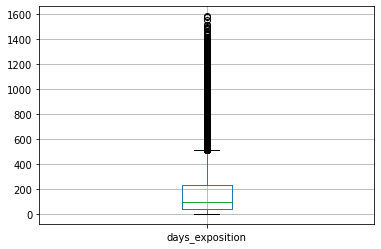

In [72]:
df.boxplot('days_exposition')


Оставим предел в 500 дней

In [73]:
df['days_exposition'] = df.loc[df['days_exposition']<500, 'days_exposition']

In [74]:
print(len(df))
df[['days_exposition']].describe()

23650


,days_exposition
count,18721.000000
mean,126.889055
std,119.022015
min,1.000000
25%,41.000000
50%,84.000000
75%,181.000000
max,499.000000


Период стал более реалистичен. Мы убрали 8% данных.

### Посчитайте и добавьте в таблицу новые столбцы

In [75]:
df['cost_meter']= df['last_price'] / df['total_area']
df['cost_meter'] #столбец с ценой одного квадратного метра 

0         120370.37037
1         82920.792079
2         92785.714286
3                 <NA>
4             100000.0
             ...      
23694     72490.845228
23695     52542.372881
23696     44091.710758
23697    149511.400651
23698     41795.665635
Name: cost_meter, Length: 23650, dtype: Float64

In [76]:
df['weekday'] = df.loc[:, 'first_day_exposition'].dt.weekday
df['weekday']
#Проставим день недели где 0-понедельник

0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: weekday, Length: 23650, dtype: int64

In [77]:
df['month'] = df.loc[:, 'first_day_exposition'].dt.month
df['month']
#Проставим месяц

0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: month, Length: 23650, dtype: int64

In [78]:
df['year'] = df.loc[:, 'first_day_exposition'].dt.year
df['year']
#Проставим год

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year, Length: 23650, dtype: int64

In [79]:
def categorize_floor(row):
    try: 
        if row['floor'] == 1:
            return 'Первый'
        elif row ['floor'] == row ['floors_total'] and row['floor'] !=1:
            return 'Последний'
        else:
            return 'Другой'
    except:
        pass
df['floor_category'] = df.apply(categorize_floor, axis=1)
df['floor_category']   #Тип этажа квартиры

0        Другой
1        Первый
2        Другой
3        Другой
4        Другой
          ...  
23694    Другой
23695    Другой
23696    Первый
23697    Другой
23698    Первый
Name: floor_category, Length: 23650, dtype: object

In [80]:
df['center_near_km']=df['cityCenters_nearest']//1000
df['center_near_km'] #Расстояние в км до центра города

0          16
1          18
2          13
3           6
4           8
         ... 
23694       4
23695    <NA>
23696    <NA>
23697      10
23698    <NA>
Name: center_near_km, Length: 23650, dtype: Int64

### Проведите исследовательский анализ данных

In [81]:
df[['total_area','living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor', 'floor_category', 'floors_total', 'cityCenters_nearest', 'airports_nearest', 'parks_nearest','weekday', 'month']].describe()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,floors_total,cityCenters_nearest,airports_nearest,parks_nearest,weekday,month
count,23409.000000,21030.000000,20227.000000,2.321100e+04,23560.000000,23599.000000,23650.000000,23565.000000,18139.000000,18116.000000,8064.000000,23650.000000,23650.000000
mean,58.150130,31.669338,9.525464,5.947274e+06,2.047326,2.679414,5.893277,10.675875,14197.860742,28803.225878,490.830729,2.568710,6.401564
std,26.445484,14.117834,3.157235,4.544728e+06,1.006837,0.220840,4.883317,6.594823,8606.830295,12637.314144,342.554386,1.788808,3.491418
min,17.000000,5.400000,1.300000,1.010000e+06,0.000000,2.200000,1.000000,1.000000,181.000000,0.000000,1.000000,0.000000,1.000000
25%,40.000000,18.400000,7.000000,3.450000e+06,1.000000,2.600000,2.000000,5.000000,9241.000000,18575.750000,288.000000,1.000000,3.000000
50%,51.800000,30.000000,9.000000,4.650000e+06,2.000000,2.600000,4.000000,9.000000,13105.000000,26756.500000,454.500000,3.000000,6.000000
75%,68.800000,41.000000,11.100000,6.700000e+06,3.000000,2.700000,8.000000,16.000000,16293.000000,37294.000000,612.000000,4.000000,10.000000
max,199.200000,79.740000,19.940000,3.999000e+07,6.000000,4.900000,33.000000,60.000000,65968.000000,84869.000000,3190.000000,6.000000,12.000000


Общая площадь максимальная 900 и максимальное значение по количеству комнат 19, возможно это нежилые помещения или общежития.
В общем средние значение вполне нормальные.

<AxesSubplot:>

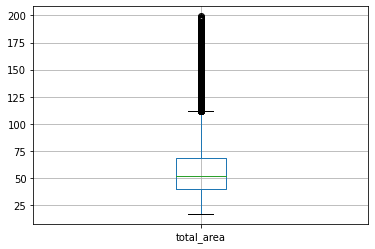

In [82]:
df.boxplot(column='total_area') #Посмотрим выбивающиеся значения


Text(0, 0.5, 'количество предложений')

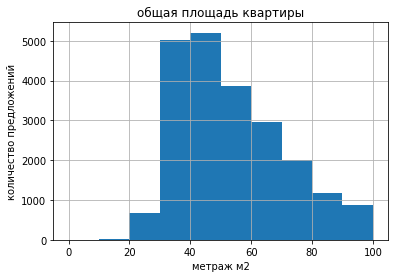

In [83]:
df.query('total_area<200')['total_area'].hist(range=(0,100))
plt.title('общая площадь квартиры')
plt.xlabel('метраж м2')
plt.ylabel('количество предложений')#Для наглядности уберем квартиры с площадью более 100кв.м и построим гистограмму

Большая часть квартир имеет метраж 30-60 кв.м. Пик приходится на квартиры с площадью 50кв.м.

<AxesSubplot:>

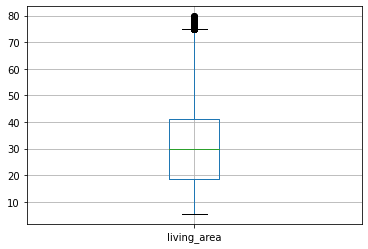

In [84]:
df.boxplot(column='living_area')#Посмотрим выбивающиеся значения

Text(0, 0.5, 'количесво предложений')

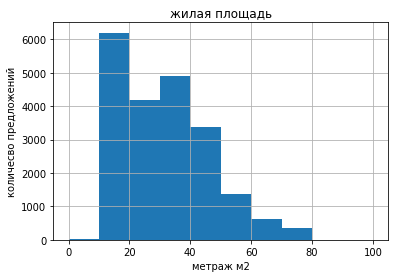

In [85]:
df.query('living_area<80')['living_area'].hist(range=(0,100))
plt.title('жилая площадь')
plt.xlabel('метраж м2')
plt.ylabel('количесво предложений')#Для наглядности уберем квартиры с жилой площадью более 75кв.м и построим гистограмму

Жилая площадь в основном составляет 10-40кв.м. 

<AxesSubplot:>

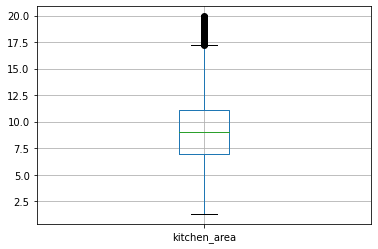

In [86]:
df.boxplot(column='kitchen_area')#Посмотрим выбивающиеся значения

Text(0, 0.5, 'количество предложений')

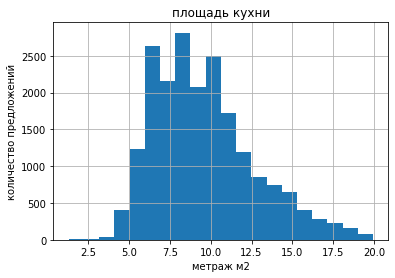

In [87]:
df.query('kitchen_area<20')['kitchen_area'].hist(bins=20)
plt.title('площадь кухни')
plt.xlabel('метраж м2')
plt.ylabel('количество предложений')#Для наглядности уберем квартиры с кухней более 60кв.м и построим гистограмму

Площадь кухни в основном составляет 6-10кв.м. Пик приходится на 8кв.м.

<AxesSubplot:>

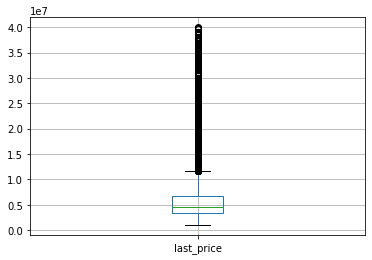

In [88]:
df.boxplot(column='last_price')#Посмотрим выбивающиеся значения

In [89]:
df['last_price'].describe()

count    2.321100e+04
mean     5.947274e+06
std      4.544728e+06
min      1.010000e+06
25%      3.450000e+06
50%      4.650000e+06
75%      6.700000e+06
max      3.999000e+07
Name: last_price, dtype: float64

Text(0.5, 0, 'цена на момент снятия с публикации')

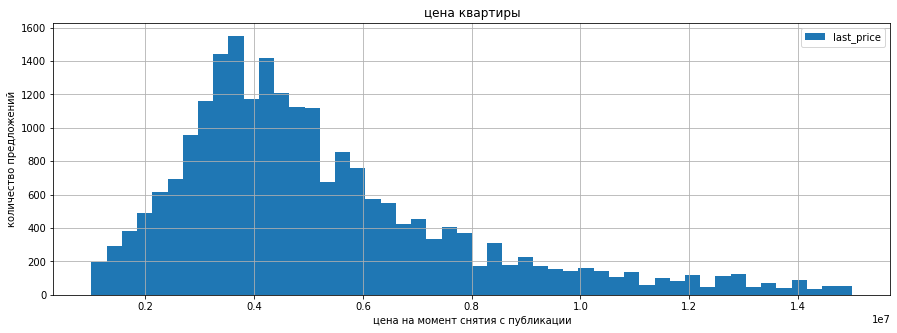

In [90]:
good_df = df.query('last_price < 15000000')
good_df.plot(kind='hist', y='last_price', grid=True, bins=50, figsize=(15,5))
plt.title('цена квартиры')
plt.ylabel('количество предложений')
plt.xlabel('цена на момент снятия с публикации')
#Для наглядности уберем квартиры со стоимостью выше 10млн и построим гистограмму

Большинсво квартир находится в ценовом сегменте 3-5 млн.руб. Пик приходится на 4,5млн.

<AxesSubplot:>

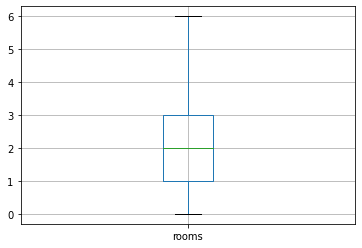

In [91]:
df.boxplot(column='rooms')#Посмотрим выбивающиеся значения

Text(0.5, 0, 'количество комнат')

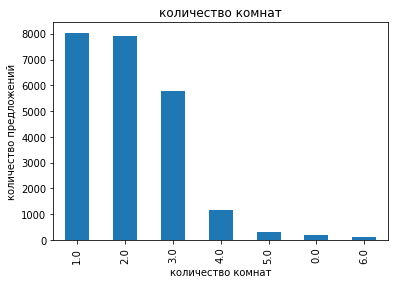

In [92]:
df.query('rooms<7')['rooms'].value_counts().plot(kind='bar')
plt.title('количество комнат')
plt.ylabel('количество предложений')
plt.xlabel('количество комнат')
#Для наглядности уберем квартиры с количеством комнат больше 6 и построим гистограмму

Самые распространенные квартиры имеющие 1 или 2 комнаты.

<AxesSubplot:>

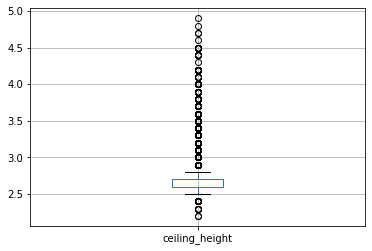

In [93]:
df.boxplot(column='ceiling_height')#Посмотрим выбивающиеся значения

Text(0.5, 0, 'высота потолков м.')

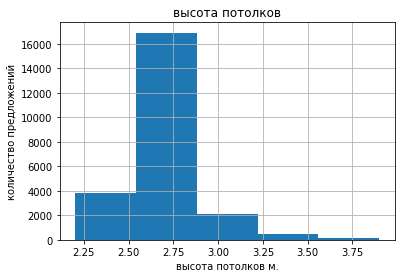

In [94]:
df.query('ceiling_height<4')['ceiling_height'].hist(bins=5)
plt.title('высота потолков')
plt.ylabel('количество предложений')
plt.xlabel('высота потолков м.')#Для наглядности уберем квартиры с высотой потолков более 4 м. и построим гистограмму

Высота потолков в основном составляет 2,55-2,8м. Пик приходится на 2.75 м.

<AxesSubplot:>

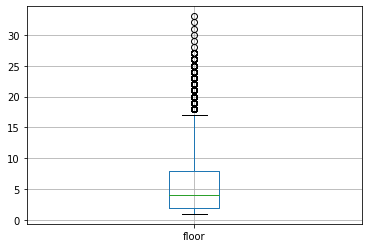

In [95]:
df.boxplot(column='floor')#Посмотрим выбивающиеся значения

Text(0.5, 0, 'количество этажей')

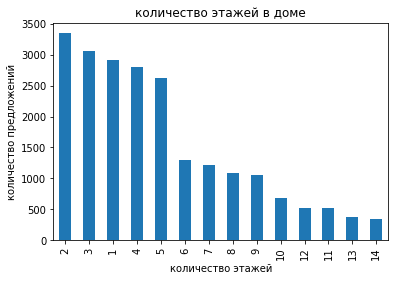

In [96]:
df.query('floor<15')['floor'].value_counts().plot(kind='bar')
plt.title('количество этажей в доме')
plt.ylabel('количество предложений')
plt.xlabel('количество этажей')#Для наглядности уберем квартиры выше 15-го этажа и построим гистограмму

Большинство квартир находится на втором, третьем и первом этажах.

Text(0.5, 0, 'категория этажа')

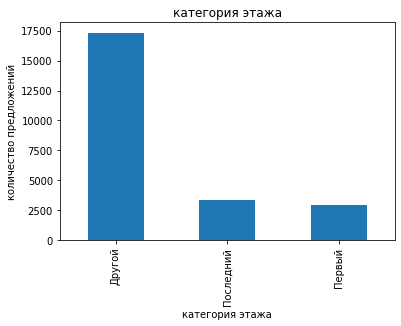

In [97]:
df['floor_category'].value_counts().plot(kind='bar')
plt.title('категория этажа')
plt.ylabel('количество предложений')
plt.xlabel('категория этажа')#Построим диаграмму категорий

В основном квартиры находятся не на первом и не на последнем этажах.

<AxesSubplot:>

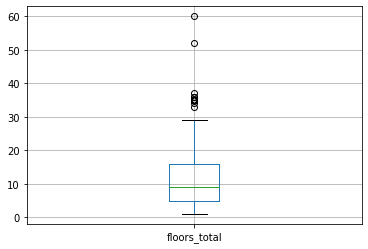

In [98]:
df.boxplot(column='floors_total')#Посмотрим выбивающиеся значения

Text(0.5, 0, 'количество этажей')

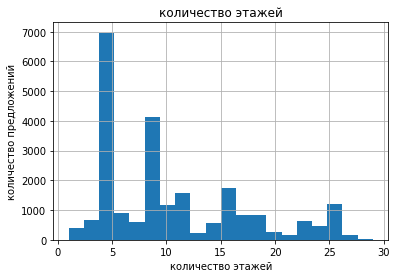

In [99]:
df.query('floors_total<30')['floors_total'].hist(bins=20)
plt.title('количество этажей')
plt.ylabel('количество предложений')
plt.xlabel('количество этажей')#Для наглядности уберем дома имеющие более 30 этажей и построим гистограмму

Квартиры в основном находятся в пяти и девятиэтажных домах. Пик приходится на пятиэтажки.

<AxesSubplot:>

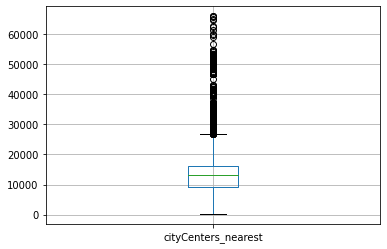

In [100]:
df.boxplot(column='cityCenters_nearest')#Посмотрим выбивающиеся значения

Text(0.5, 0, 'количество метров')

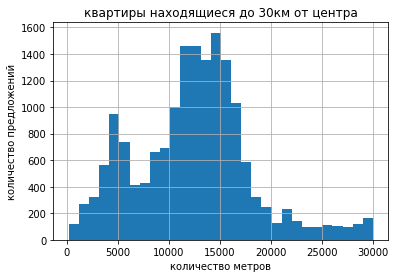

In [101]:
df.query('cityCenters_nearest<30000')['cityCenters_nearest'].hist(bins=30)
plt.title('квартиры находящиеся до 30км от центра')
plt.ylabel('количество предложений')
plt.xlabel('количество метров')#Для наглядности выберем квартиры находящиеся до 30км от центра города и построим гистограмму

Большинство квартир находится в 10-17 километрах от центра города. Пик приходится на 15 км.

<AxesSubplot:>

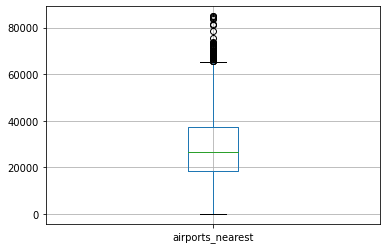

In [102]:
df.boxplot(column='airports_nearest')#Посмотрим выбивающиеся значения

Text(0.5, 0, 'количество метров')

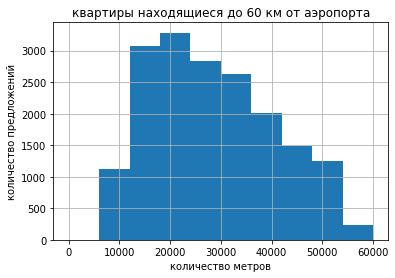

In [103]:
df.query('airports_nearest<60000')['airports_nearest'].hist(range=(0,60000))
plt.title('квартиры находящиеся до 60 км от аэропорта')
plt.ylabel('количество предложений')
plt.xlabel('количество метров')# Выбираем квартиры находящиеся до 60 км от аэропорта

Большинство квартир находятя в 15-30 км. от аэроорта. Пик приходится на 20км.

<AxesSubplot:>

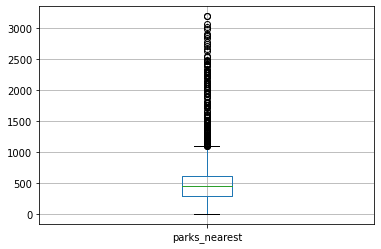

In [104]:
df.boxplot(column='parks_nearest')#Посмотрим выбивающиеся значения

Text(0.5, 0, 'количество метров')

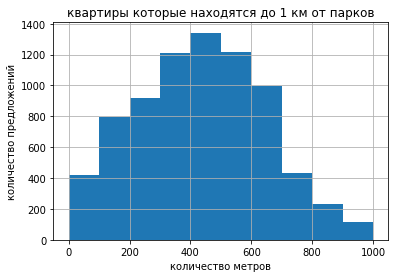

In [105]:
df.query('parks_nearest<1000')['parks_nearest'].hist(range=(0,1000))
plt.title('квартиры которые находятся до 1 км от парков')
plt.ylabel('количество предложений')
plt.xlabel('количество метров')#Выбираем квартиры которые находятся до 1 км от парков

Наверное в этом городе достаточно парков. Большинство квартир имет парк недалеко от дома, расстояние составляет 200-600м. Пик приходится на 500м.

Text(0.5, 0, 'день недели (0-пн)')

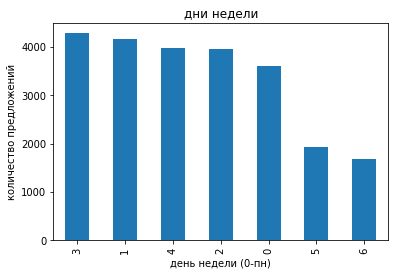

In [106]:
df['weekday'].value_counts().plot(kind='bar') 
plt.title('дни недели')
plt.ylabel('количество предложений')
plt.xlabel('день недели (0-пн)')#Построим диаграмму для дней недели

Большинство объявлений было опубликовано в четверг и во вторник.

Text(0.5, 0, 'месяц')

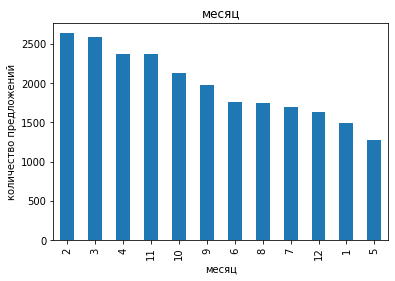

In [107]:
df['month'].value_counts().plot(kind='bar') 
plt.title('месяц')
plt.ylabel('количество предложений')
plt.xlabel('месяц')#Построим диаграмму для месяца

В основном объявления были опубликованы в феврале, марте и апреле. 

In [108]:
df['days_exposition'].describe()

count    18721.000000
mean       126.889055
std        119.022015
min          1.000000
25%         41.000000
50%         84.000000
75%        181.000000
max        499.000000
Name: days_exposition, dtype: float64

In [109]:
df['days_exposition'].median()

84.0

Среднее время продажи 180дн.(полгода), Медиана 84дн.

([<matplotlib.axis.XTick at 0x7f87560c65b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

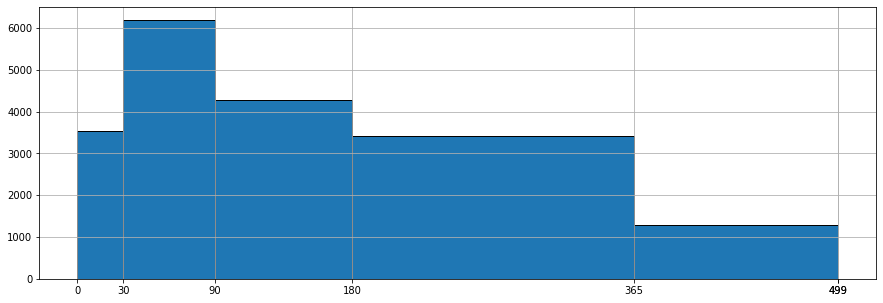

In [110]:
bins = [0, 30, 90, 180, 365, 499, df.days_exposition.max()]
df.days_exposition.hist(figsize=(15, 5), bins=bins, ec='black')
plt.xticks(bins) #Разбьем данные на корзины и посмотрим какие данные преобладают

Большинство квартир продавались в периоде 30-90 дней. Очень быстрый период составляет до 30 дней, очень долгий от 90 дней.

Text(0.5, 0, 'количество дней')

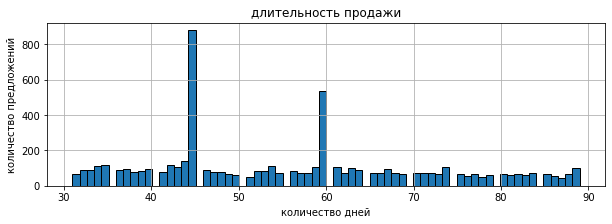

In [111]:
df.query('30<days_exposition<90')['days_exposition'].hist(bins=70, figsize=(10,3), ec='black') 
plt.title('длительность продажи')
plt.ylabel('количество предложений')
plt.xlabel('количество дней') #посмотрим период 30-90дней

Объявления закрывались каждый 45-й и 60-й день. Возможно зависит от подписки продавца на сайте.

# Задание: Какие факторы больше всего влияют на общую (полную) стоимость объекта

Text(0.5, 0, 'площадь')

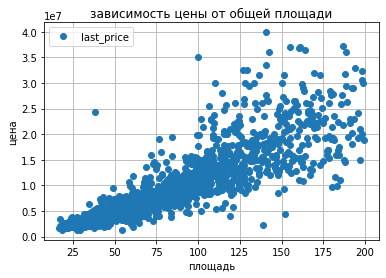

In [112]:
df.pivot_table(index='total_area', values='last_price').plot(style='o', grid=True) #Посмотрим график зависимости цены от общей площади

plt.title('зависимость цены от общей площади')
plt.ylabel('цена')
plt.xlabel('площадь')

Чем больше площадь, тем выше стоимость. 

Text(0.5, 0, 'площадь')

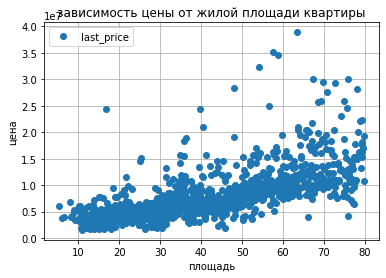

In [113]:
df.pivot_table(index='living_area', values='last_price').plot(style='o',grid=True ) #Посмотрим график зависимости цены от жилой площади квартиры

plt.title('зависимость цены от жилой площади квартиры')
plt.ylabel('цена')
plt.xlabel('площадь')

Чем больше площадь, тем выше стоимость. 

Text(0.5, 0, 'площадь')

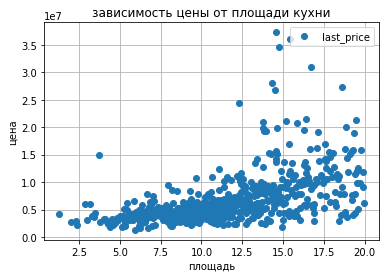

In [114]:
df.pivot_table(index='kitchen_area', values='last_price').plot(style='o', grid=True) #Посмотрим график зависимости цены от площади кухни

plt.title('зависимость цены от площади кухни')
plt.ylabel('цена')
plt.xlabel('площадь')

Чем больше площадь, тем выше стоимость. 

Text(0.5, 0, 'категория этажа')

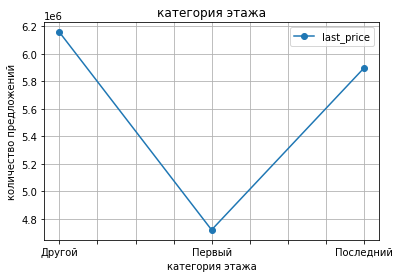

In [115]:
df.pivot_table(index='floor_category', values='last_price').plot(style='o-', grid=True) #Посмотрим график зависимости цены от типа этажа

plt.title('категория этажа')
plt.ylabel('количество предложений')
plt.xlabel('категория этажа')

Чем выше этаж, тем больше стоимость квартиры. Самые дешевые квартиры, находящиеся на первом этаже.

Text(0.5, 0, 'день недели')

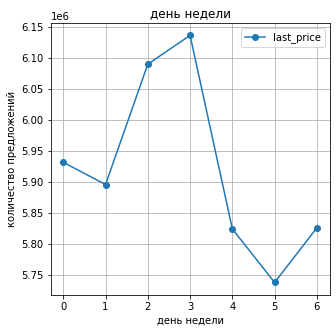

In [116]:
df.pivot_table(index='weekday', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.title('день недели')
plt.ylabel('количество предложений')
plt.xlabel('день недели')#Посмотрим график зависимости цены от дня недели

Дороже всего квартиры, опубликованные вo вторник, дешевле всего - в субботу.

Text(0.5, 0, 'месяц')

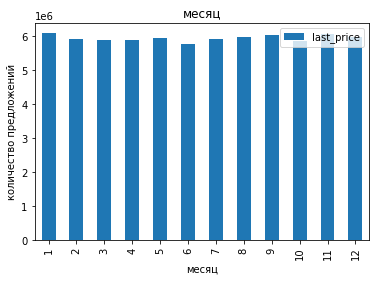

In [117]:
df.pivot_table(index='month', values='last_price').plot(kind='bar')
plt.title('месяц')
plt.ylabel('количество предложений')
plt.xlabel('месяц')#Посмотрим график зависимости цены от месяца

Дороже всего квартиры, продающиеся с апреля, дешевле всего - с июня.

Text(0.5, 0, 'год')

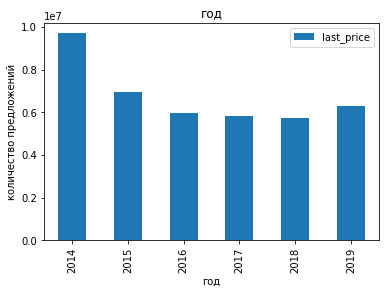

In [118]:
df.pivot_table(index='year', values='last_price').plot(kind='bar')
plt.title('год')
plt.ylabel('количество предложений')
plt.xlabel('год')#Посмотрим график зависимости цены от года

Выделяется 2014 год. Тогда был кризис и люди наверняка хотели сохранить сбережения вложив их в недвижимость, тем самым увеличив спрос, ну и соответственно цену объектов.

<AxesSubplot:>

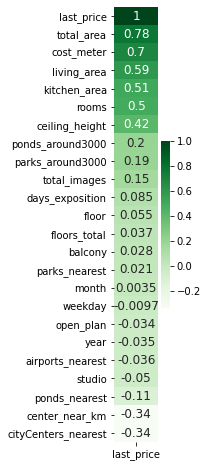

In [119]:
plt.figure(figsize=(1,8))
sns.heatmap(df.corr()[['last_price']].sort_values(by='last_price', ascending=False), cmap="Greens", 
            annot=True, annot_kws={'size':12})

Больше всего на цену влияют площадь(общая,жилая,кухни), количество комнат и высота потолков. 

# Задание: Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [120]:
df['cost_per_metr'] = (df['last_price'] / df['total_area']).astype('Int64')
df['cost_per_metr'] =  df['cost_per_metr'] * 100
df['cost_per_metr']#посчитаем цену за квадратный метр

0        12037000
1         8292000
2         9278500
3            <NA>
4        10000000
           ...   
23694     7249000
23695     5254200
23696     4409100
23697    14951100
23698     4179500
Name: cost_per_metr, Length: 23650, dtype: Int64

In [121]:
locality_top= df.groupby('locality_name')['last_price'].count().sort_values(ascending=False)
locality_top = locality_top.iloc[0:10]
locality_top_list = list(locality_top.index)
df.query('locality_name.isin(@locality_top_list)').groupby('locality_name')['cost_per_metr'].mean().sort_values(ascending=False)
#Выведен список из 10 городов с наибольшим количествои объявлений и самой высокой стоимостью 1 квадратного метра

locality_name
Санкт-Петербург      11073529.007535
Пушкин               10200120.380435
деревня Кудрово       9247308.695652
поселок Парголово     9005559.633028
поселок Мурино         8568130.57554
поселок Шушары        7867690.454545
Колпино               7510998.816568
Гатчина               6893474.183007
Всеволожск            6871882.115869
Выборг                5868524.892704
Name: cost_per_metr, dtype: Float64

Выведен список из 10 городов с наибольшим количествои объявлений и самой высокой стоимостью 1 квадратного метра. Самый дорогой квадратный метр в Санкт-Петербурге, на втором месте город Пушкин. Почти в два раза дешевле выходит квадратный метр в городе Выборг.

# Задание: Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра.

In [122]:
df['cityCenters_nearest_km'] = (df['cityCenters_nearest'] / 1000)
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].fillna(value=0).astype(int)
df.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km', values='last_price',aggfunc='mean')

,last_price
cityCenters_nearest_km,
0,12710163.72093
1,12016035.869955
2,11062945.138889
3,10371272.847953
4,11675135.527873
5,11147457.622407
6,10645117.525
7,9390467.6
8,8389136.379671


Чем квартира дальше от центра, тем дешевле.

In [123]:
df['total_area'].median()

51.8

In [124]:
df['cost_per_metr'].median()

9486100.0

### Общий вывод

Были выявлены все факторы влияющих на стоимость квартиры:
Общая площадь квартиры - Чем больше площадь квартиры, тем выше цена. Медиана площади квартиры равна 52кв.м. 
Цена за квадратный метр - Чем больше цена за квадратный метр, тем выше цена. Медиана цены за кв.м. равна 95000р.Самый дорогой квадратный метр в Санкт-Петербурге, на втором месте город Пушкин. Почти в два раза дешевле выходит квадратный метр в городе Выборг.
Доля жилой площади/кухни  - Чем выше доля жилой площади/площадь кухни, тем выше цена. Жилая площадь в основном составляет 10-40кв.м.Площадь кухни в основном составляет 6-10кв.м.Пик приходится на 8кв.м.
Количество комнат - Чем больше комнат, тем выше цена. Самые распространенные квартиры имеющие 1 или 2 комнаты.
Этаж - На первом этаже квартира дешевле, чем на остальных; на последнем дороже, чем на первом, но дешевле чем на остальных. В основном квартиры находятся не на первом и не на последнем этажах.Большинство квартир находится на втором, третьем и первом этажах.Квартиры в основном находятся в пяти и девятиэтажных домах.
Удаленность от центра - Чем ближе к центру, тем дороже квартира. В самом центре (< 1 км до центра) квартиры стоят на порядок дороже, чем на более удаленных.Средняя цена первого километра от центра города равна 12 млн.р , второго километра 11млн.р.
Большинство квартир находится в 10-17 километрах от центра города, а так же в  15-30 км. от аэроорта.
Большинство квартир имет парк недалеко от дома, расстояние до парка составляет 200-600м.
День размещения объявления - Квартиры, размещенные к продаже в будние дни, в среднем дороже, чем размещенные в выходные. Дороже всего квартиры, опубликованные вo вторник, дешевле всего - в субботу.
Месяц размещения объявления - Дороже всего квартиры, продающиеся с апреля, дешевле всего - с июня.
Год размещения объявления - Квартиры, размещенные к продаже в 2014 году, дороже всех. Следующие года был кризис, но до 2019г. В 2019г. фиксируется снова скачек цен. 
Среднее время продажи 180дн.(полгода), Медиана 84дн. Большинство квартир продавались в первые 45 дней.Очень быстрый период продажи составляет до 30 дней, очень долгий от 90 дней.